In [1]:
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Multiple Linear Regression Models'

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

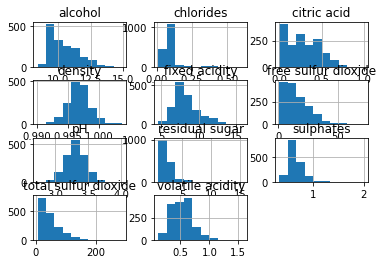

In [6]:
cdf = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
cdf.hist()
plt.show()

In [7]:
#training and testing
msk = np.random.rand(len(df)) < 0.3
train = df[msk]
test = df[~msk]

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol',]])
train_y = np.asanyarray(train[['quality']])
regr.fit(train_x,train_y)
print("The coefficients are : ",regr.coef_)
print("The Intercept is : ",regr.intercept_)

The coefficients are :  [[ 7.29459930e-03 -8.85440376e-01  1.31155836e-01  6.14648314e-02
  -1.32235113e+00  4.14556697e-03 -2.85529065e-03 -5.60712719e+01
  -5.42705003e-01  1.25138940e+00  2.56701898e-01]]
The Intercept is :  [60.19351227]


In [14]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol',]])
test_y = np.asanyarray(test[['quality']])
yhat = regr.predict(test_x)
print("The MAE is : %.2f" %np.mean(np.absolute(yhat - test_y )))
print("The MSE is : %.2f" %np.mean((yhat - test_y)**2))

The MAE is : 0.51
The MSE is : 0.45


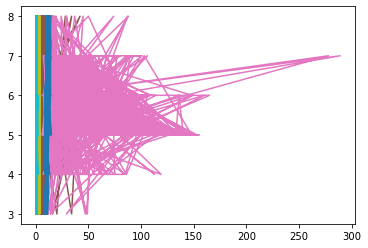

In [18]:
plt.plot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']],df.quality)
